<a href="https://colab.research.google.com/github/BhavnaMalladi/Signal_Processing_Projects/blob/ntab-module1/For_Student_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries: numpy (math, matrix operations), scipy (a huge signal processing library), and
# pyplot (a plotting library)

import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

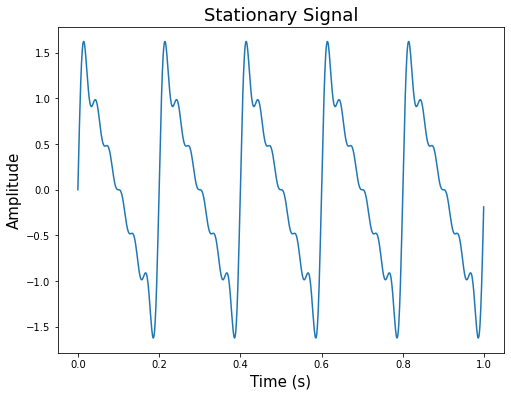

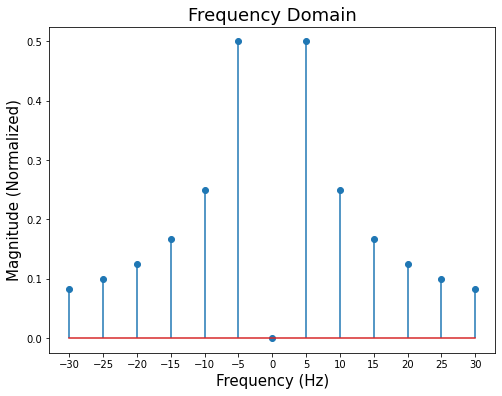

In [ ]:
# Fourier Transform Visualization - sum of two sinusoids

fs = 1000 # sampling frequency of 1000 Hz
t = np.linspace(0, 1, fs, False) # create a time axis from 0 -> 1 second with 1000 points

frequencies = [5, 10, 15, 20, 25, 30] # frequencies of the sinusoids in our signal

y = 0
for i in range(len(frequencies)):
    coeff = 1 / (i+1) # coeff = 1 for 10 Hz, 1/2 for 15 Hz, 1/3 for 20 Hz, etc.
    freq = frequencies[i]
    sig = coeff * np.sin(2 * np.pi * freq * t)
    y += sig # add the weighted sinusoid to our overall signal 'y'


# Time Domain Plot
plt.figure(figsize=(8,6))
plt.plot(t,y)
plt.title('Stationary Signal', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.show()

# Frequency Domain Plot
freqs = np.linspace(- fs // 2, fs // 2, fs, False)
h = np.fft.fft(y)
h /= len(h)
h = np.fft.fftshift(h)
plt.figure(figsize=(8,6))
plt.stem(freqs[470:535:5], abs(h)[470:535:5])
plt.title('Frequency Domain', fontsize = 18)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Magnitude (Normalized)', fontsize = 15)
plt.xticks(np.linspace(-30, 30, 13))
plt.show()

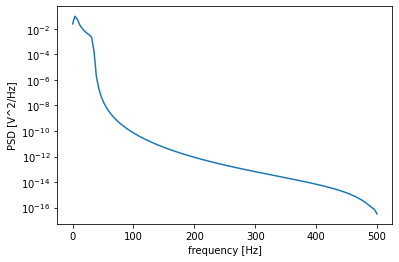

In [ ]:
#Power Spectral Density Plot
f, Pxx_den = signal.welch(y, fs)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.show()

In [ ]:
# Spectrogram Example

# Use a chirp signal as the example
fs = 7200
T = 4
t = np.arange(0, int(T*fs)) / fs

#Generate a linear chirp from 5 -> 1250 Hz
w = signal.chirp(t, f0=5, f1=1250, t1=T, method='linear')

# much of this code below came from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html
def plot_spectrogram(title, w, fs):
     ff, tt, Sxx = signal.spectrogram(w, fs=fs, nperseg=256, nfft=576)
     plt.figure(figsize=(8,6))
     plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='turbo', shading='gouraud')
     plt.colorbar()
     plt.title(title, fontsize = 18)
     plt.xlabel('Time (s)', fontsize = 15)
     plt.ylabel('Frequency (Hz)', fontsize = 15)
     plt.grid()

Text(0.5, 1.0, 'Linear Chirp from 5 to 50 Hz')

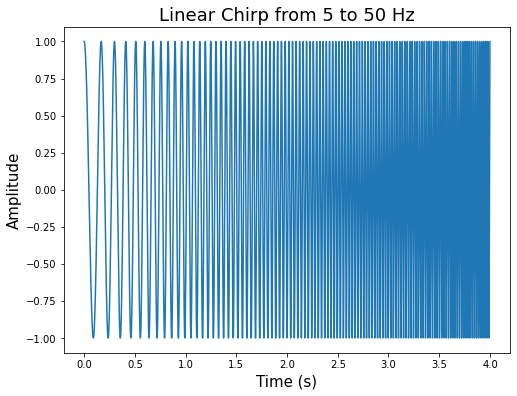

In [ ]:
w = signal.chirp(t, f0=5, f1=50, t1=T, method='linear')
plt.figure(figsize=(8,6))
plt.plot(t,w)
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Linear Chirp from 5 to 50 Hz', fontsize=18)

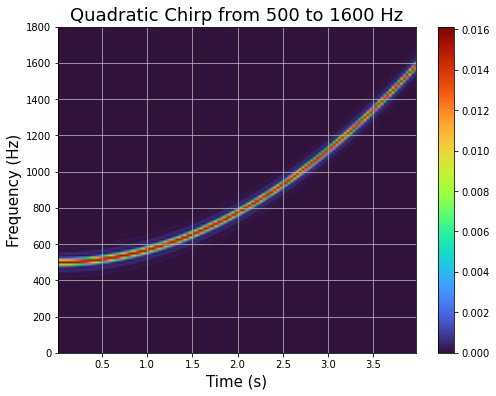

In [ ]:
# Generate a quadratic chirp from 500 to 1600 Hz
w = signal.chirp(t, f0=500, f1=1600, t1=T, method='quadratic')
plot_spectrogram('Quadratic Chirp from 500 to 1600 Hz', w, fs)

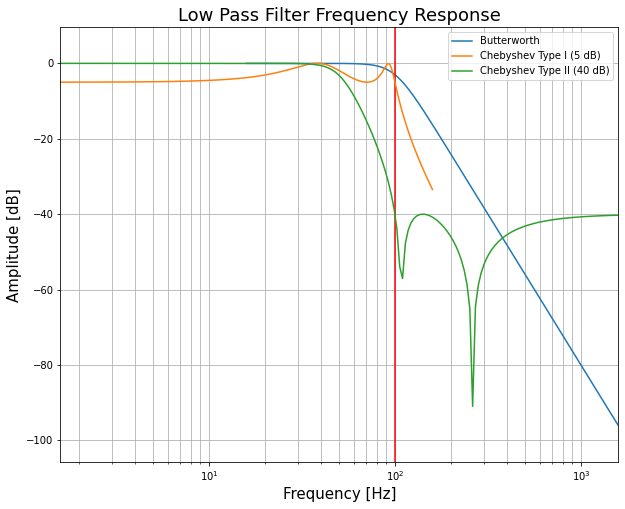

In [ ]:
# Demo of Filters

# Butterworth Low Pass Filter
# Design a 4th order Butterworth LPF with a cutoff frequency of 100 Hz

order = 4
cutoff = 100 * 2 * np.pi # the units for an 'analog = True' filter are radians/sec

# b,a are the filter coefficients (for the numerator and denominator polynomials)
# to learn more about how filter coefficients work, read here: https://en.wikipedia.org/wiki/Digital_filter
b,a = signal.butter(order, cutoff, btype = 'low', analog = True, output = 'ba')
w, h = signal.freqs(b, a)

# Plot the frequency response
f = w / (2 * np.pi)
plt.figure(figsize=(10,8))
plt.semilogx(f, 20 * np.log10(abs(h)), label='Butterworth')
plt.title('Low Pass Filter Frequency Response', fontsize=18)
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('Amplitude [dB]', fontsize=15)
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff / (2 * np.pi), color='red') # cutoff frequency

# Chebyshev Type I filter (ripple in the passband)
bc,ac = signal.cheby1(order, 5, cutoff, btype='low', analog = True, output = 'ba')
wc, hc = signal.freqs(bc, ac)
fc = wc / (2 * np.pi)
plt.semilogx(fc, 20 * np.log10(abs(hc)), label='Chebyshev Type I (5 dB)')

# Chebyshev Type II (ripple in the stopband)
bc2,ac2 = signal.cheby2(order, 40, cutoff, btype='low', analog = True, output = 'ba')
wc2, hc2 = signal.freqs(bc2, ac2)
fc2 = wc2 / (2 * np.pi)
plt.semilogx(fc2, 20 * np.log10(abs(hc2)), label='Chebyshev Type II (40 dB)')

plt.legend(loc='best', prop={'size': 10})
plt.show()

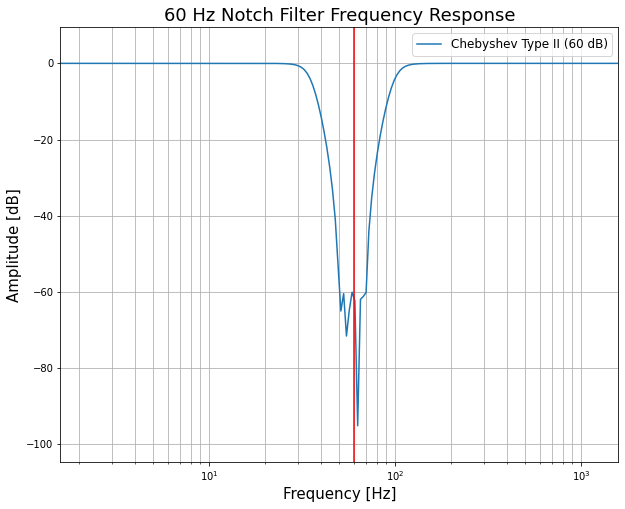

In [ ]:
# An example of a bandstop filter for 60 Hz rejection
# Using Chebyshev type II filter

bc2,ac2 = signal.cheby2(4, 60, [50 * 2 * np.pi, 70 * 2 * np.pi], btype='bandstop', analog = True, output = 'ba')
wc2, hc2 = signal.freqs(bc2, ac2)
fc2 = wc2 / (2 * np.pi)
plt.figure(figsize=(10,8))
plt.semilogx(fc2, 20 * np.log10(abs(hc2)), label='Chebyshev Type II (60 dB)')
plt.title('60 Hz Notch Filter Frequency Response', fontsize=18)
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('Amplitude [dB]', fontsize=15)
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(60, color='red') # notch frequency
plt.legend(loc='best', prop={'size':12})

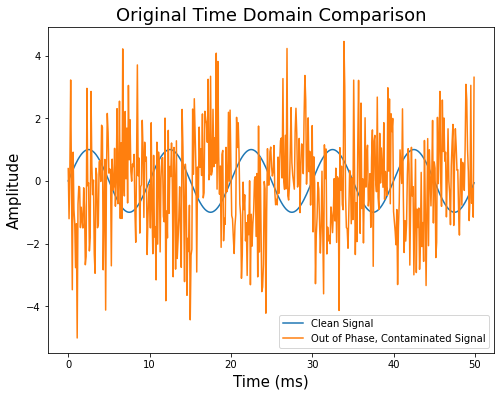

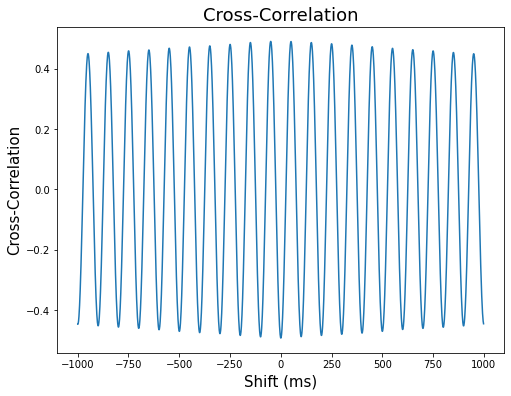

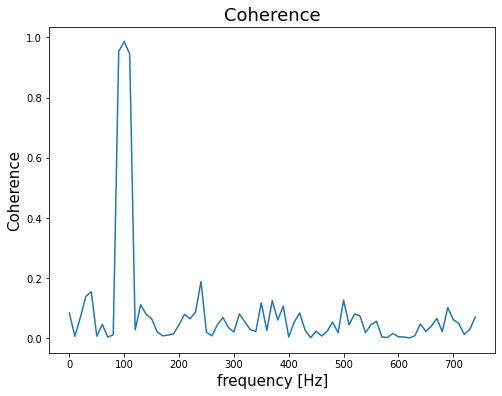

In [ ]:
# Correlation vs. Coherence

fs = 10000
T = 1
t = t = np.arange(0, int(T*fs)) / fs

x = np.sin(2 * np.pi * 100 * t) # clean sinusoid

sigma = 1.5
noise = np.random.normal(scale=sigma, size=len(t))
y = x + noise # add Gaussian noise to the clean sinusoid
y = np.roll(y, 50) #shift the y signal perfectly out of phase with x

plt.figure(figsize=(8,6))
plt.plot(t[:500] * 1e3,x[:500], label='Clean Signal')
plt.plot(t[:500] * 1e3,y[:500], label ='Out of Phase, Contaminated Signal')
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Original Time Domain Comparison', fontsize=18)
plt.legend(loc='best', prop={'size':10})
plt.show()

plt.figure(figsize=(8,6))
corr = signal.correlate(x, y, mode='same') / len(x)
shifts = np.linspace(- fs // 2, fs // 2 - 1, fs)
plt.plot(shifts[4000:6000], corr[4000:6000])
plt.xlabel('Shift (ms)', fontsize=15)
plt.ylabel('Cross-Correlation', fontsize=15)
plt.title('Cross-Correlation', fontsize=18)
plt.show()

plt.figure(figsize=(8,6))
f, Cxy = signal.coherence(x, y, fs, nperseg=1000)
plt.plot(f[:75], Cxy[:75])
plt.xlabel('frequency [Hz]', fontsize=15)
plt.ylabel('Coherence', fontsize=15)
plt.title('Coherence', fontsize=18)
plt.show()

List at least <b>3</b> things that you learned from the lecture or lab